In [1]:
import tweepy
from time import sleep
import time
from time import sleep
import pandas as pd
from google.colab import files

important link to understand Scraping tweets from tweeter

https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f#c2a9

# Scraping Tweets Using Tweepy 

In [2]:
# private information for Tweeter developer
consumer_key = "xxxxxxxxxxx"
consumer_secret = "xxxxxxxxxxxxxxxxxxxxxxxx"
access_token = "xxxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxxxxxxxxx"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [3]:
# search query
text_query = 'moderna vaccine'
# number of tweets 
count = 5000
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query+"-filter:retweets",since="2021-11-01",until="2021-11-28").items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[ tweet.id,tweet.created_at,tweet.text, tweet.user.location ,tweet.user.verified, tweet.favorite_count, tweet.user.screen_name, tweet.user.id_str, tweet.user.url, tweet.user.followers_count, tweet.user.friends_count, tweet.user.statuses_count, tweet.user.default_profile_image, 
 tweet.lang] for tweet in tweets]

 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 tweets_df = pd.DataFrame(tweets_list)
 headers =  [ "tweet.id","tweet.created_at","tweet.text", "tweet.user.location" ,"tweet.user.verified", "tweet.favorite_count", "tweet.user.screen_name", "tweet.user.id_str", "tweet.user.url", "tweet.user.followers_count", "tweet.user.friends_count", "tweet.user.statuses_count", "tweet.user.default_profile_image", 
"tweet.lang"]
 tweets_df.columns = headers
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

failed on_status, Length mismatch: Expected axis has 0 elements, new values have 14 elements


In [4]:
print(tweets_df.shape)
tweets_df.to_csv('tweets_df_moderna.csv')
tweets_df.head()

(0, 0)


""


In [ ]:
# download the dataframe as .csv 
files.download('tweets_df_moderna.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# preprocessing Data 

In [ ]:
# read the three datasets
import pandas as pd
df_pfizer = pd.read_csv('/content/tweets_df_pfizer.csv')
df_johnson = pd.read_csv('/content/tweets_df_johnson.csv')
df_moderna = pd.read_csv('/content/tweets_df_moderna.csv')

In [ ]:
import re  
def preprocesTweets(tweet_list):
  processed_tweets = []
  for tweet in range(0, len(tweet_list)):  
      
      # Remove all the special characters
      processed_tweet = re.sub(r'\W', ' ', str(tweet_list[tweet]))
      #Reomove URL 
      processed_tweet=re.sub(r'https://S+', '', processed_tweet)
      
      # remove all single characters
      processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
  
      # Remove single characters from the start
      processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
  
      # Substituting multiple spaces with single space
      processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
  
      # Removing prefixed 'b'
      processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

      processed_tweet = re.sub(r'\n', ' ', processed_tweet)

      # Converting to Lowercase
      processed_tweet = processed_tweet.lower()
  
      processed_tweets.append(processed_tweet)
  return processed_tweets

In [ ]:
df_pfizer["Clean_text"] = preprocesTweets(df_pfizer["tweet.text"])
df_johnson["Clean_text"] = preprocesTweets(df_johnson["tweet.text"])
df_moderna["Clean_text"] = preprocesTweets(df_moderna["tweet.text"])

In [ ]:
# Import all required libraries
import nltk
import numpy as np
import re
import pandas as pd 
import pylab as pl
import matplotlib.pyplot as plt

from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot

#plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

!pip install datashader
import datashader as ds
import datashader.transfer_functions as tf

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from nltk.stem.porter import *

def processVaccine(VDataFrame):
  VDataFrame['Clean_text'] = VDataFrame['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
  tokenized_tweet = VDataFrame['Clean_text'].apply(lambda x: x.split())
  stemmer = PorterStemmer()
  for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
  VDataFrame['Clean_text'] = tokenized_tweet
  return VDataFrame

In [ ]:
df_pfizer_cleaned = processVaccine(df_pfizer)
df_johnson_cleaned = processVaccine(df_johnson)
df_moderna_cleaned = processVaccine(df_moderna)

In [ ]:
df_pfizer_cleaned.loc[:,('tweet.text','Clean_text')]

,tweet.text,Clean_text
0,@thrasherxy I worked at the in-take desk of a Pfizer Covid-19 vaccine clinic for 7 months.\n\nNO ONE was ever asked a… https://t.co/FcLJk5wtod,thrasherxy worked take desk pfizer covid vaccine clinic months ever asked https fcljk5wtod
1,"@Astevenson30 @RealCandaceO Pfizer falsified data to get the vaccine approved. That must not worry you, eh?",astevenson30 realcandaceo pfizer falsified data vaccine approved that must worry
2,Pfizer said an updated version of its COVID-19 vaccine will be 'ready in 100 days' if the new Omicron variant is re… https://t.co/MJrJ620ZoD,pfizer said updated version covid vaccine will ready days omicron variant https mjrj620zod
3,Except for the fact that their profits were $8b in Q3.\n\nAre you secretly a Pfizer shill trying to make people onlin… https://t.co/fXyhzoPIUl,except fact that their profits were secretly pfizer shill trying make people onlin https fxyhzopiul
4,"New Omicron vaccine will be ready in 100 days if current vaccine renders ineffective against new variant, Pfizer sa… https://t.co/K5s0hyCB81",omicron vaccine will ready days current vaccine renders ineffective against variant pfizer https k5s0hycb81
...,...,...
4995,It would be prudent for Pfizer and Moderna to expedite production of a vaccine that targets key mutations in the De… https://t.co/uuf9s6XUKv,would prudent pfizer moderna expedite production vaccine that targets mutations https uuf9s6xukv
4996,"@DunnettGeorge @lisajblee @talkRADIO @THEJamesWhale @virtualash Depends on the specific vaccine, with Pfizer and Mo… https://t.co/91HdbiOx5k",dunnettgeorge lisajblee talkradio thejameswhale virtualash depends specific vaccine with pfizer https 91hdbiox5k
4997,"@fuctmind BioNTech/Pfizer expects lab test data on the impact of the ""new variant"" within 2 weeks; then decide whet… https://t.co/XIGmWKIxqD",fuctmind biontech pfizer expects test data impact variant within weeks then decide whet https xigmwkixqd
4998,Many of you will be shocked to hear this but I have to let you know that I’ve made an appointment for my first Covi… https://t.co/kKz0N1uJwQ,many will shocked hear this have know that made appointment first covi https kkz0n1ujwq


# textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

In [ ]:
def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [ ]:
def labelDataset(df):
  df['sentiment']=df.Clean_text.apply(calculate_sentiment)
  df['sentiment_analyser']=df.Clean_text.apply(calculate_sentiment_analyser)
  s = pd.DataFrame(index = range(0,len(df)),columns= ['compound_score','label'])
  for i in range(0,len(df)): 
    s['compound_score'][i] = df['sentiment_analyser'][i]['compound']
    if (df['sentiment_analyser'][i]['compound'] <= -0.05):
      s['label'][i] = 'Negative'    
    if (df['sentiment_analyser'][i]['compound'] >= 0.05):
      s['label'][i] = 'Positive'
    if ((df['sentiment_analyser'][i]['compound'] >= -0.05) & (df['sentiment_analyser'][i]['compound'] <= 0.05)):
      s['label'][i] = 'Neutral'
    
  df['compound_score'] = s['compound_score']
  df['label'] = s['label']
  return df



In [ ]:
df_pfizer_labeled=labelDataset(df_pfizer_cleaned)
df_johnson_labeled=labelDataset(df_johnson_cleaned)
df_moderna_labeled=labelDataset(df_moderna_cleaned)
df_moderna_labeled


,Unnamed: 0,tweet.id,tweet.created_at,tweet.text,tweet.user.location,tweet.user.verified,tweet.favorite_count,tweet.user.screen_name,tweet.user.id_str,tweet.user.url,tweet.user.followers_count,tweet.user.friends_count,tweet.user.statuses_count,tweet.user.default_profile_image,tweet.lang,Clean_text,sentiment,sentiment_analyser,compound_score,label
0,0,1464745692027576324,2021-11-27 23:59:21,"If this #Moderna vaccine has fucked me up in any way, it's on sight for any of your fucking science creeps.",NaN,False,2,NobodyHame,1415744328245420039,NaN,56,1257,1540,False,en,this moderna vaccine fucked sight your fucking science creeps,"(-0.6, 0.75)","{'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.6597}",-0.6597,Negative
1,1,1464745560917753862,2021-11-27 23:58:50,@RockiiiiRoadd I'm just saying when moderna vaccine go up y'all thank Rocki &amp; Ace pls thanks,loading....,False,0,jadastackhouse,125464406,NaN,13292,445,162464,False,en,rockiiiiroadd just saying when moderna vaccine thank rocki thanks,"(0.2, 0.2)","{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.6597}",0.6597,Positive
2,2,1464743557533741060,2021-11-27 23:50:52,@PeterHotez A brilliant plan to help Pfizer and Moderna by creating a vaccine that's cheaper and easier to produce.,Toronto,False,0,alan_page_ca,932440272,NaN,33,59,302,False,en,peterhotez brilliant plan help pfizer moderna creating vaccine that cheaper easier produce,"(0.9, 1.0)","{'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compound': 0.8885}",0.8885,Positive
3,3,1464742185753010186,2021-11-27 23:45:25,"Hey, Fox Boy. You do know that the Moderna vaccine needs cryogenic storage which is in short supply in Africa, don’… https://t.co/OzqztB9k75","Old Portsmouth, England",False,1,lennylaw,20204298,NaN,1009,382,119913,False,en,know that moderna vaccine needs cryogenic storage which short supply africa https ozqztb9k75,"(0.0, 0.3)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0,Neutral
4,4,1464742113724227590,2021-11-27 23:45:08,Pfizer and Moderna said they have plans in place to deal with a vaccine-resistant variant. Moderna said it's alread… https://t.co/oPVaI4CRsP,NaN,True,7,WWLTV,14269771,https://t.co/59gYdsBJNk,211506,919,264009,False,en,pfizer moderna said they have plans place deal with vaccine resistant variant moderna said alread https opvai4crsp,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1462900472256155649,2021-11-22 21:47:06,@disclosetv In the end when it will come out to be true that Covid was a hoax seriously Pfizer and Moderna will be… https://t.co/MXoS6sCRWC,"Fontana, CA",False,0,ThePizzaAteMe,752529746798469124,NaN,29,429,4208,False,en,disclosetv when will come true that covid hoax seriously pfizer moderna will https mxos6scrwc,"(0.008333333333333331, 0.6583333333333333)","{'neg': 0.216, 'neu': 0.625, 'pos': 0.159, 'compound': 0.0}",0,Neutral
4996,4996,1462900465004212225,2021-11-22 21:47:04,@KindeandTrue That is very wrong and was widely shared in a discredited video. Even the USCCB in a Jan\ndocument not… https://t.co/7YYABV6qOV,"Albuquerque, NM",False,0,RobertaLavin,633175973,https://t.co/ucCQfJh2vR,25132,23998,22796,False,en,kindeandtrue that very wrong widely shared discredited video even usccb document https 7yyabv6qov,"(-0.375, 0.7)","{'neg': 0.332, 'neu': 0.528, 'pos': 0.141, 'compound': -0.5617}",-0.5617,Negative
4997,4997,1462900405252276229,2021-11-22 21:46:50,"y’all these vaccine antibodies are next level incredible. \n\nFive unmasked hours in the car with a sneezing, coughin… https://t.co/zW5H0ytRrm",Louisville,False,11,becksontap,106292249,NaN,199,188,10087,False,en,these vaccine antibodies next level incredible five unmasked hours with sneezing coughin https zw5h0ytrrm,"(0.45, 0.45)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0,Neutral
4998,4998,1462900035650084865,2021-11-22 21:45:22,"This is what @CDCgov is putting out. It's 

## Knowledge Graph 

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
candidate_sentences = df_pfizer['Clean_text']
candidate_sentences

0                             thrasherxy worked take desk pfizer covid vaccine clinic months ever asked https fcljk5wtod
1                                       astevenson30 realcandaceo pfizer falsified data vaccine approved that must worry
2                             pfizer said updated version covid vaccine will ready days omicron variant https mjrj620zod
3                    except fact that their profits were secretly pfizer shill trying make people onlin https fxyhzopiul
4            omicron vaccine will ready days current vaccine renders ineffective against variant pfizer https k5s0hycb81
                                                              ...                                                       
4995                    would prudent pfizer moderna expedite production vaccine that targets mutations https uuf9s6xukv
4996    dunnettgeorge lisajblee talkradio thejameswhale virtualash depends specific vaccine with pfizer https 91hdbiox5k
4997            fuctmind biontec

In [ ]:
# POS tag would not be sufficient for long span relations. We need dependency parsing as well!

def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
entity_pairs = []
for i in tqdm(candidate_sentences):
  entity_pairs.append(get_entities(i))

100%|██████████| 5000/5000 [00:51<00:00, 96.81it/s]


In [ ]:
#Get Relations
def get_relation(sent):
  doc = nlp(sent)
  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
relations = [get_relation(i) for i in tqdm(candidate_sentences)]

100%|██████████| 5000/5000 [00:47<00:00, 105.04it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

https              380
says               140
said               138
move                78
dose                66
know                59
have                56
said updated        56
received            51
reworked            50
vaccine             42
asked               33
tested against      31
take                30
created             29
think               26
update              25
pfizer              25
biontech            23
need                23
read                22
youtube             21
make                21
vaccine against     20
strain              20
consider future     18
announced           17
made                17
stop                17
working             16
shot                15
seeks               14
m                   14
want                14
voted               13
screwed             13
emerges             13
authorizes          13
sure                13
tell                12
t                   12
question            12
says necessary      11
wait       

In [ ]:
# Let's build the KG
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26082 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_

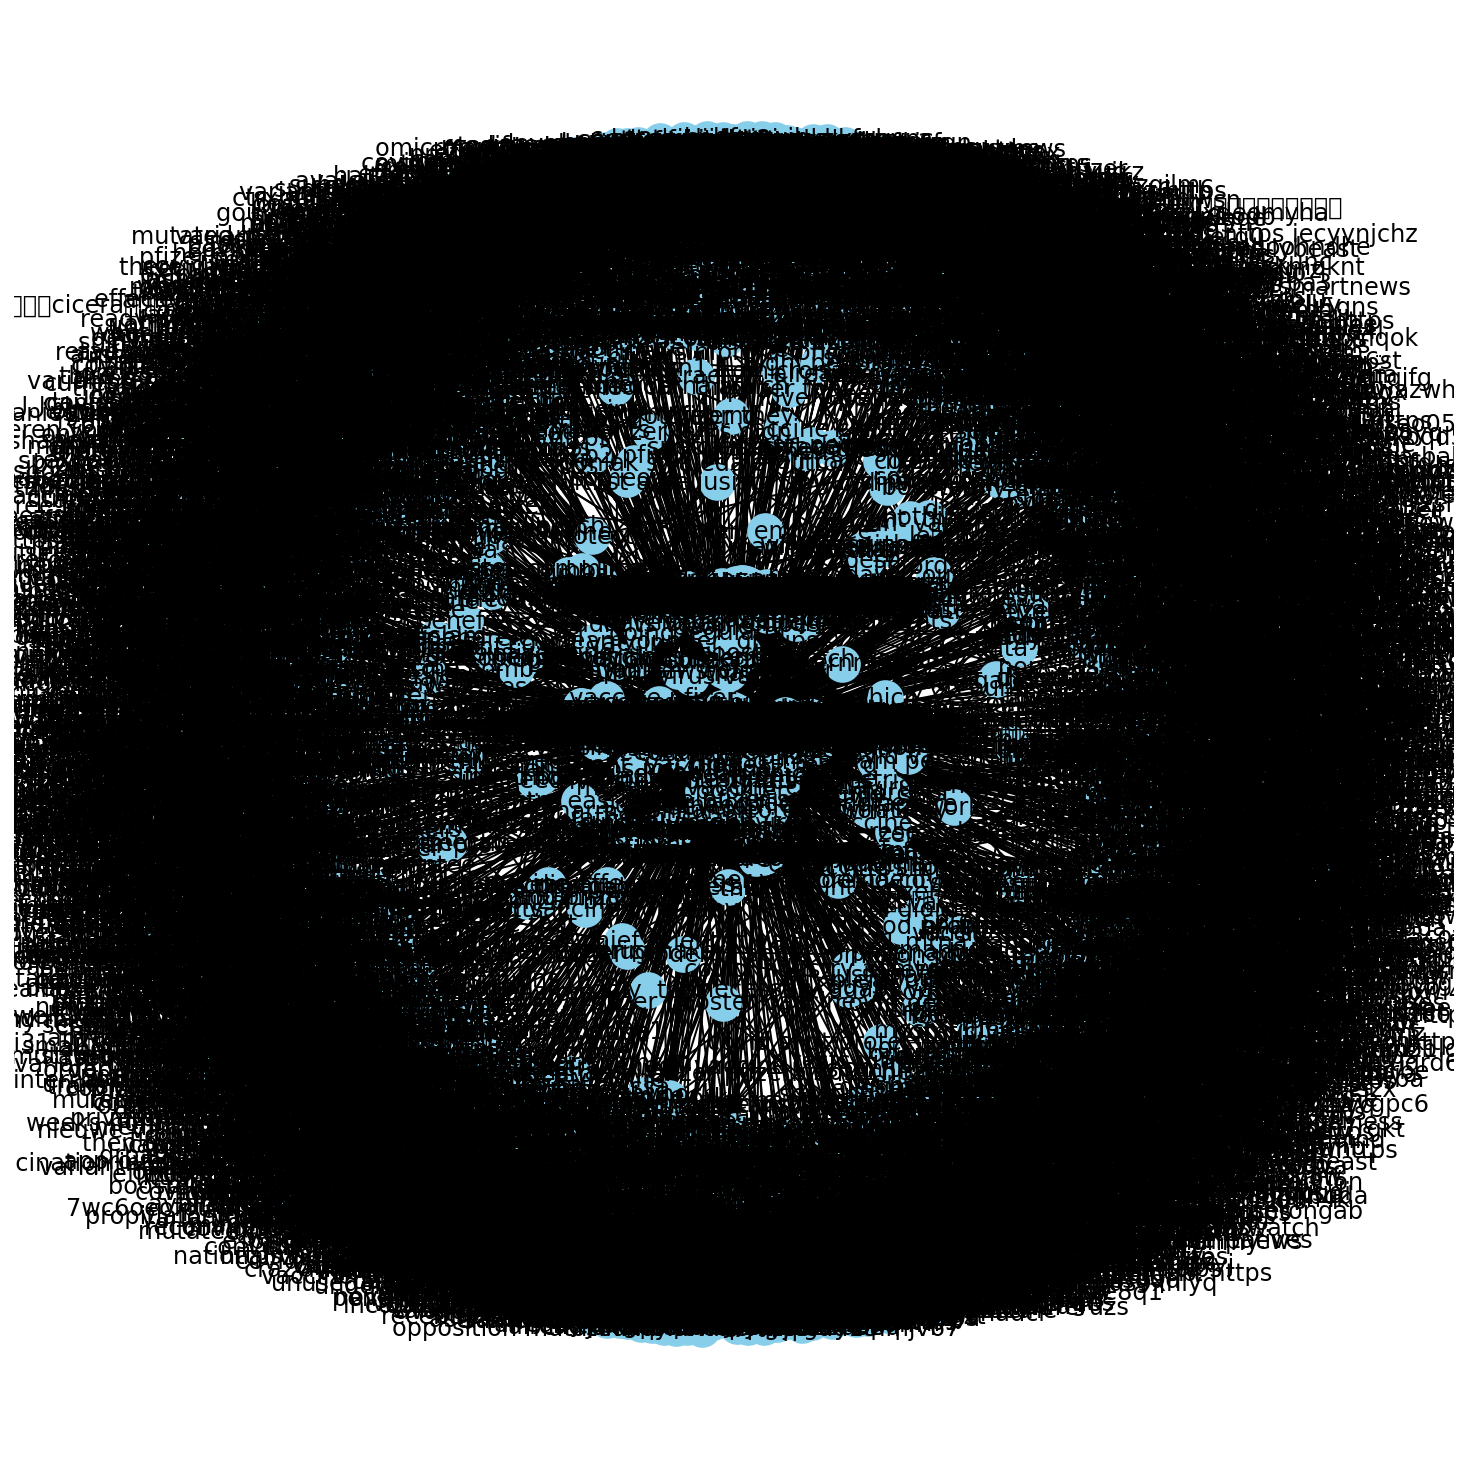

In [ ]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

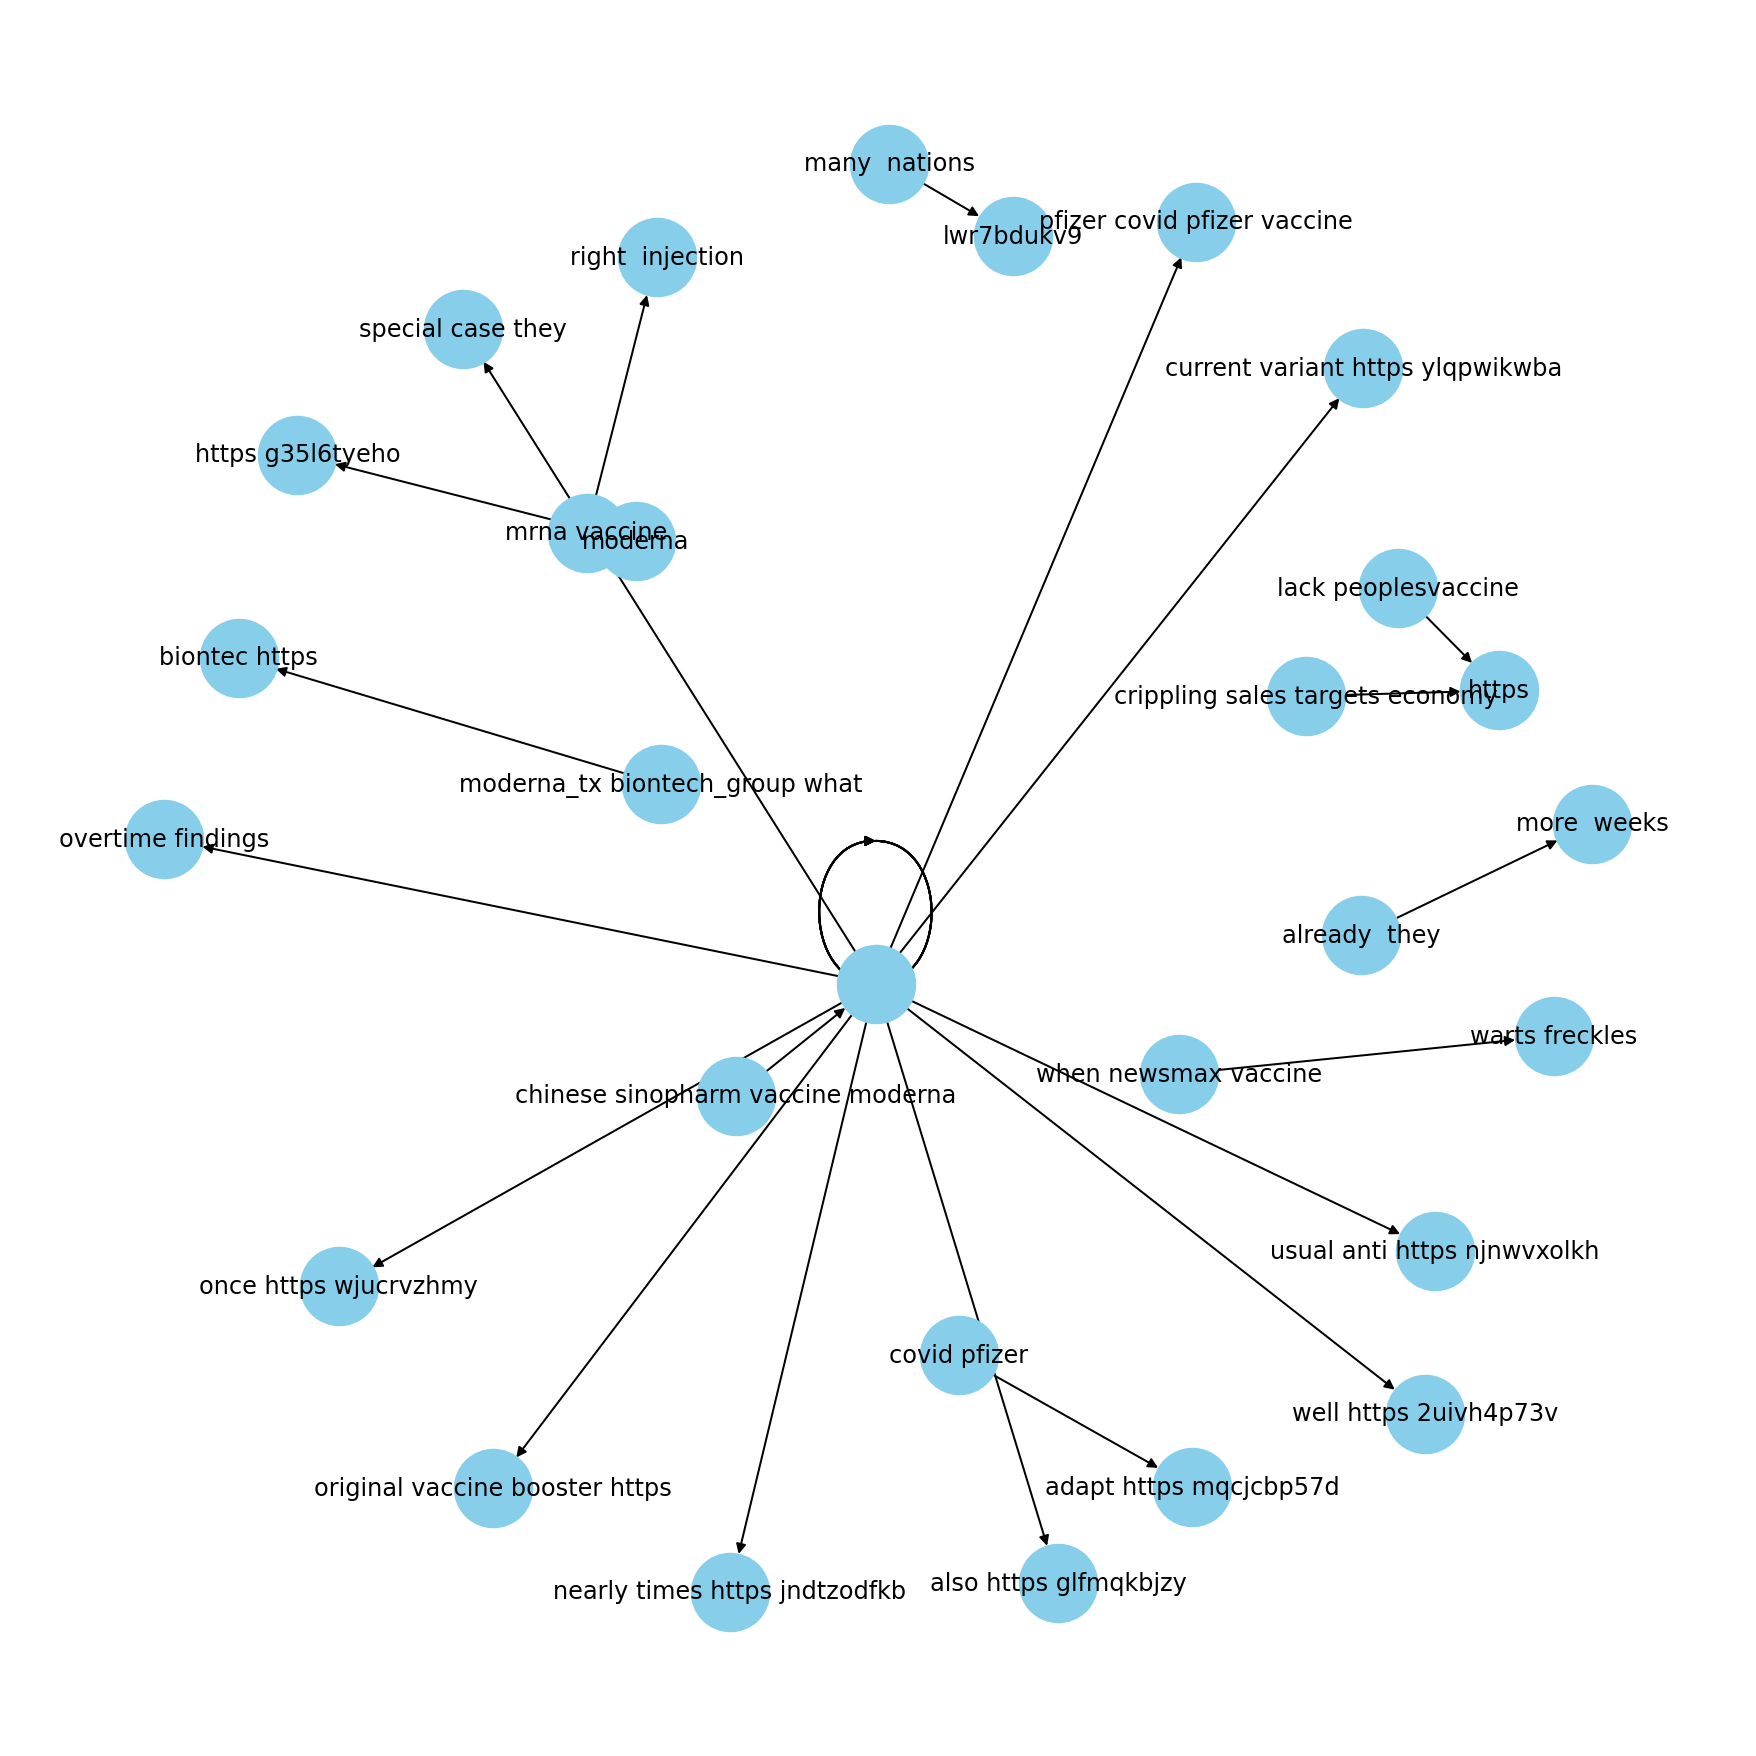

In [ ]:
# Let's filter by only important relations: pfizer
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="pfizer"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

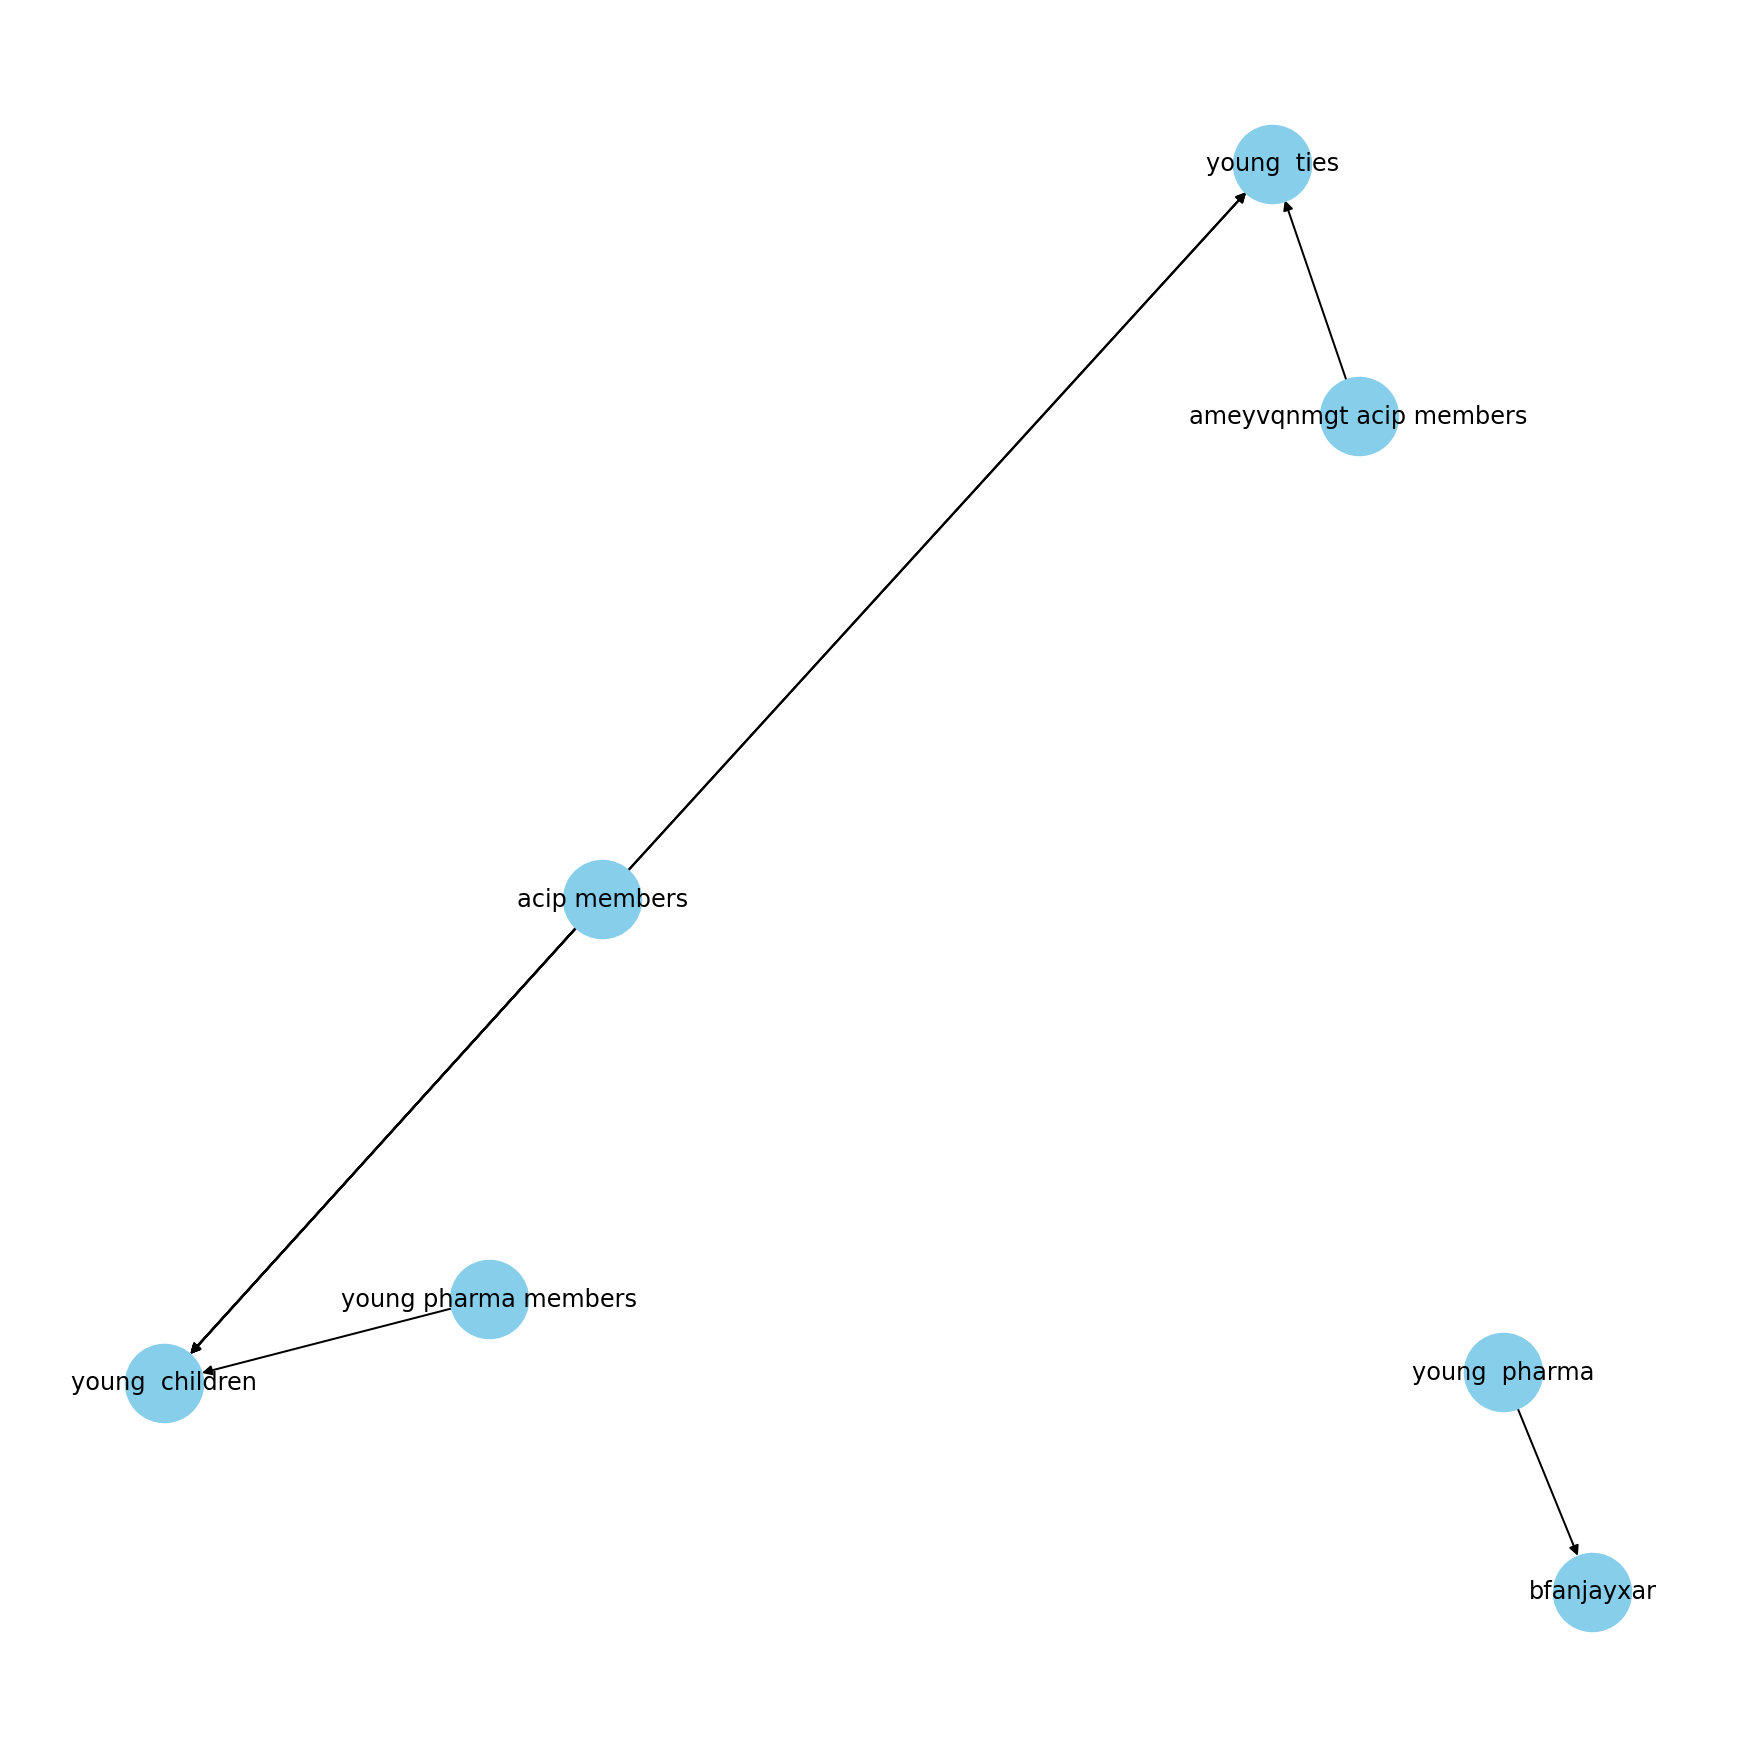

In [ ]:
# Let's filter by only important relations: say
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="voted"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

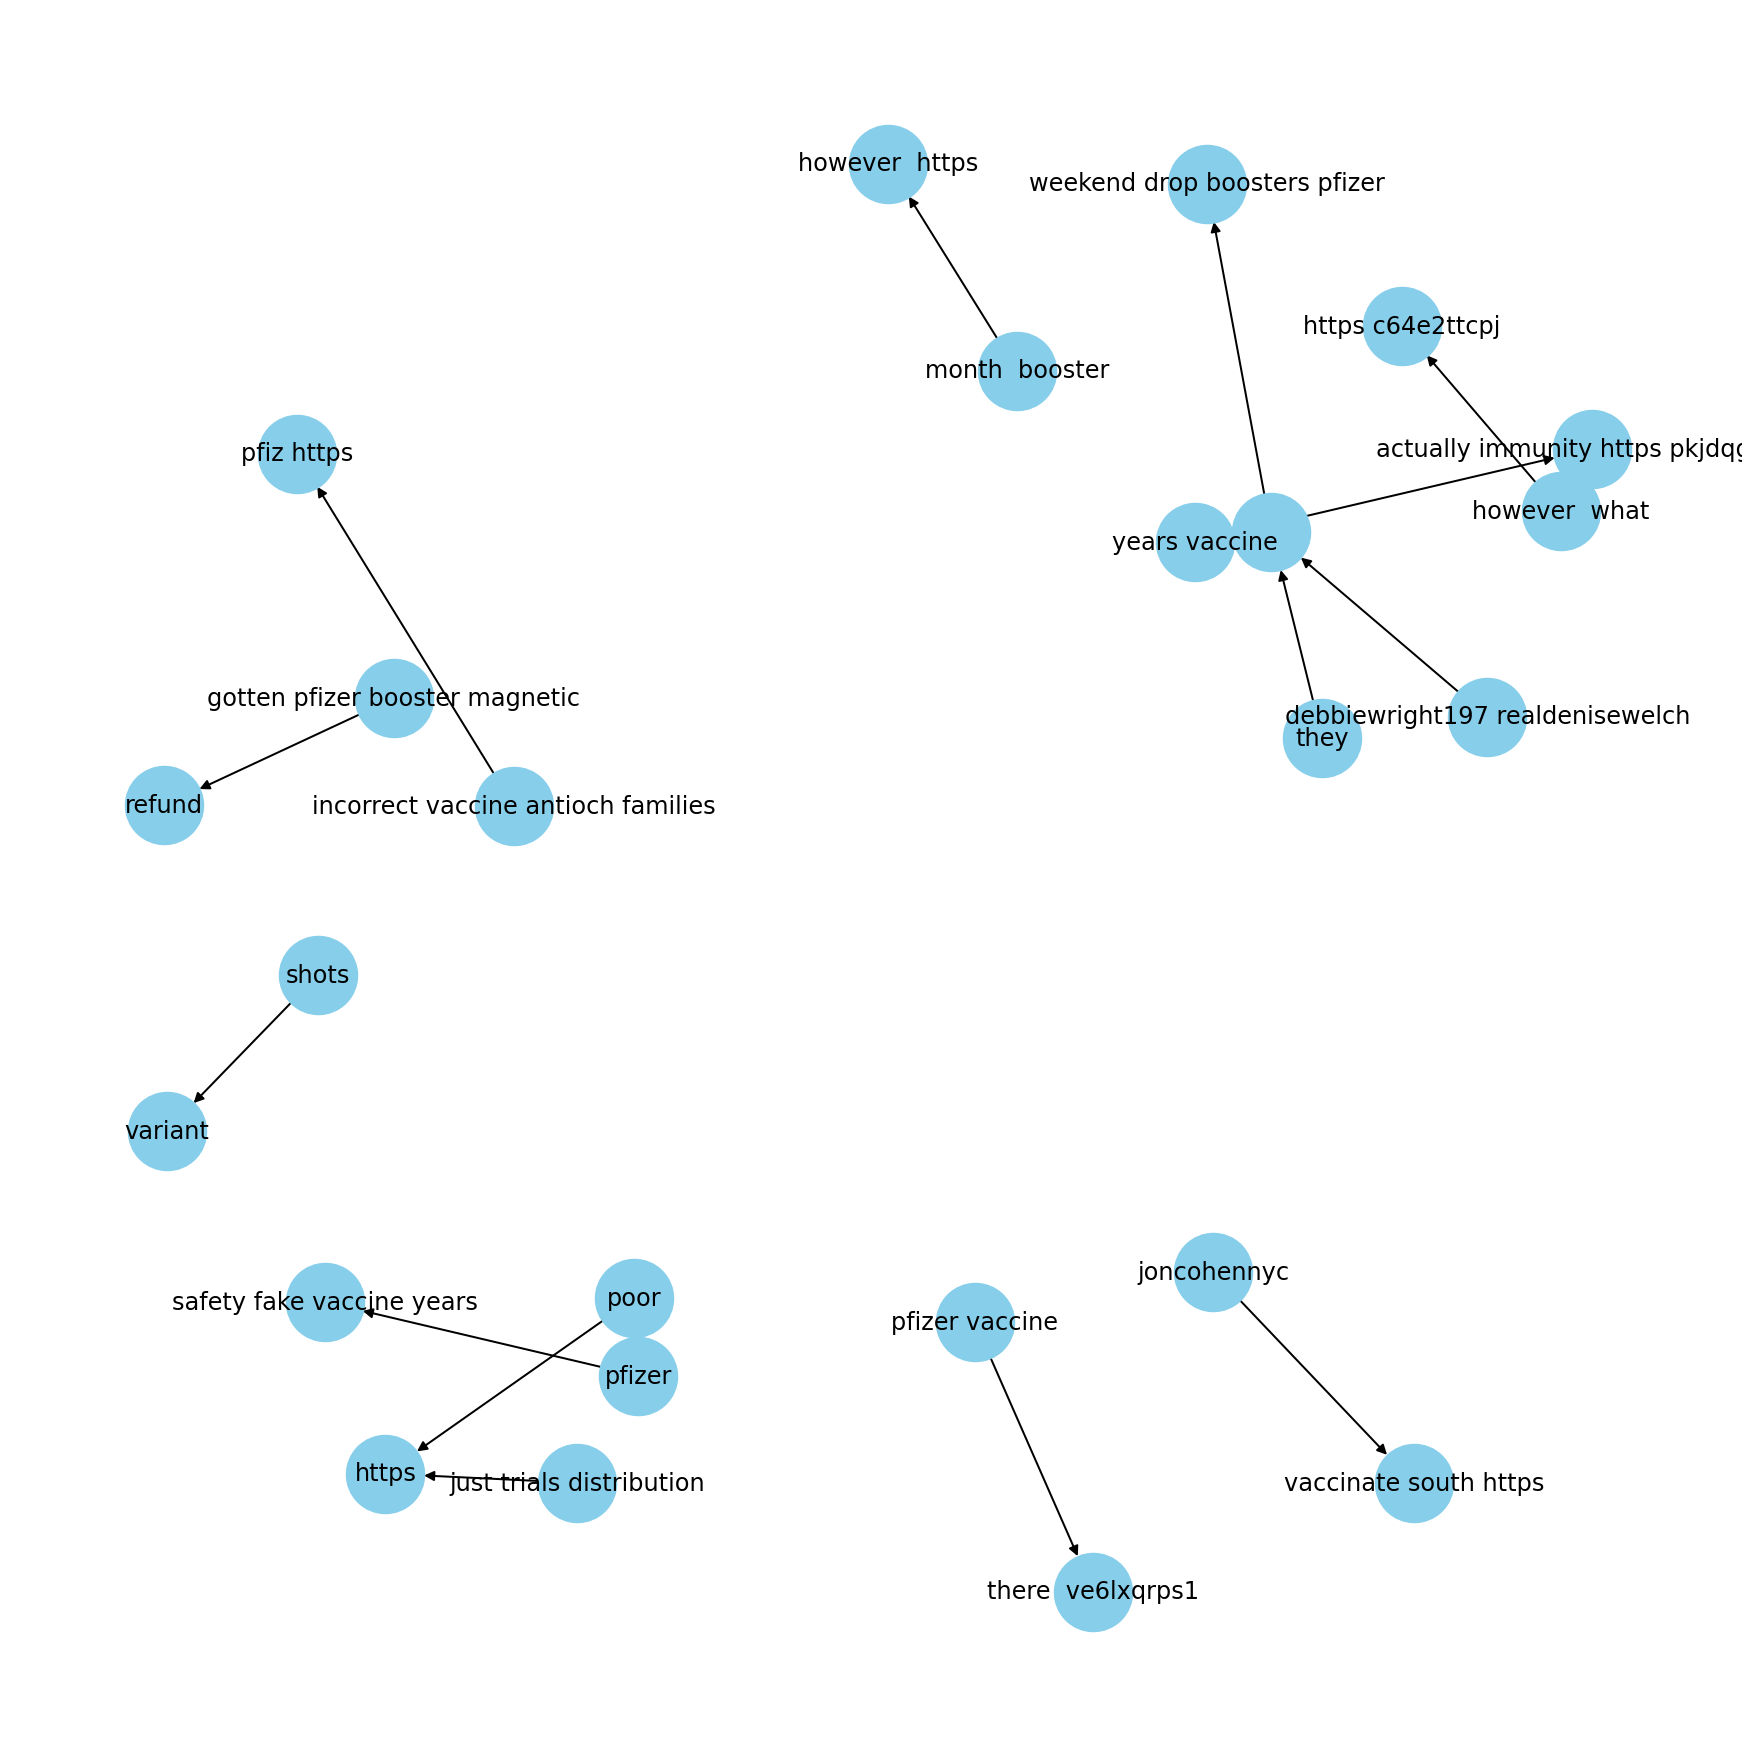

In [ ]:
# Let's filter by only important relations: want
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="want"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Functions

In [ ]:
def classifier(pipeline):
    model = Pipeline(pipeline)
    model.fit(vaccine_tuples[0],vaccine_tuples[1])
    y_pred = model.predict(vaccine_tuples[2])
    print(metrics.classification_report(vaccine_tuples[3], y_pred))
    plot_confusion_matrix(model, vaccine_tuples[2], vaccine_tuples[3])
    plt.show()

In [ ]:
df_pfizer = df_pfizer_labeled.loc[:,('tweet.text','Clean_text','label')]
df_johnson = df_johnson_labeled.loc[:,('tweet.text','Clean_text','label')]
df_moderna  = df_moderna_labeled.loc[:,('tweet.text','Clean_text','label')]

In [ ]:
from sklearn.model_selection import train_test_split
def split_train_test(df):
  dataset_train,  dataset_test = train_test_split(df)
  X_train = dataset_train["Clean_text"]
  y_train = dataset_train["label"]
  X_test = dataset_test["Clean_text"]
  y_test =  dataset_test["label"]
  return X_train,y_train,X_test,y_test

In [ ]:
df= pd.concat([df_pfizer_labeled,df_johnson_labeled,df_moderna_labeled],axis=0)
df

,Unnamed: 0,tweet.id,tweet.created_at,tweet.text,tweet.user.location,tweet.user.verified,tweet.favorite_count,tweet.user.screen_name,tweet.user.id_str,tweet.user.url,tweet.user.followers_count,tweet.user.friends_count,tweet.user.statuses_count,tweet.user.default_profile_image,tweet.lang,Clean_text,sentiment,sentiment_analyser,compound_score,label
0,0,1464745785250107393,2021-11-27 23:59:43,@thrasherxy I worked at the in-take desk of a Pfizer Covid-19 vaccine clinic for 7 months.\n\nNO ONE was ever asked a… https://t.co/FcLJk5wtod,NaN,False,5,Critters2101,1279850180985184256,NaN,47,182,665,False,en,thrasherxy worked take desk pfizer covid vaccine clinic months ever asked https fcljk5wtod,"(0.0, 0.0)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0,Neutral
1,1,1464745605146857477,2021-11-27 23:59:00,"@Astevenson30 @RealCandaceO Pfizer falsified data to get the vaccine approved. That must not worry you, eh?",NaN,False,17,terrygefCCC,2842625306,NaN,6,27,83,False,en,astevenson30 realcandaceo pfizer falsified data vaccine approved that must worry,"(0.0, 0.0)","{'neg': 0.359, 'neu': 0.458, 'pos': 0.183, 'compound': -0.4019}",-0.4019,Negative
2,2,1464745500775788549,2021-11-27 23:58:35,Pfizer said an updated version of its COVID-19 vaccine will be 'ready in 100 days' if the new Omicron variant is re… https://t.co/MJrJ620ZoD,NaN,False,0,BryceAtwell,860978250792783872,NaN,4611,5024,49219,False,en,pfizer said updated version covid vaccine will ready days omicron variant https mjrj620zod,"(0.2, 0.5)","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}",0.3612,Positive
3,3,1464745434325291009,2021-11-27 23:58:19,Except for the fact that their profits were $8b in Q3.\n\nAre you secretly a Pfizer shill trying to make people onlin… https://t.co/fXyhzoPIUl,Delocalized,False,1,mchapiro,888254846,https://t.co/4qjUcpNmWu,2730,774,20880,False,en,except fact that their profits were secretly pfizer shill trying make people onlin https fxyhzopiul,"(-0.4, 0.7)","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}",0.4404,Positive
4,4,1464745416726044672,2021-11-27 23:58:15,"New Omicron vaccine will be ready in 100 days if current vaccine renders ineffective against new variant, Pfizer sa… https://t.co/K5s0hyCB81","London, England",False,8,TheAgeOfBanana,1397883882339549190,NaN,2300,28,2315,False,en,omicron vaccine will ready days current vaccine renders ineffective against variant pfizer https k5s0hycb81,"(0.1, 0.45)","{'neg': 0.094, 'neu': 0.75, 'pos': 0.156, 'compound': 0.25}",0.25,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1462900472256155649,2021-11-22 21:47:06,@disclosetv In the end when it will come out to be true that Covid was a hoax seriously Pfizer and Moderna will be… https://t.co/MXoS6sCRWC,"Fontana, CA",False,0,ThePizzaAteMe,752529746798469124,NaN,29,429,4208,False,en,disclosetv when will come true that covid hoax seriously pfizer moderna will https mxos6scrwc,"(0.008333333333333331, 0.6583333333333333)","{'neg': 0.216, 'neu': 0.625, 'pos': 0.159, 'compound': 0.0}",0,Neutral
4996,4996,1462900465004212225,2021-11-22 21:47:04,@KindeandTrue That is very wrong and was widely shared in a discredited video. Even the USCCB in a Jan\ndocument not… https://t.co/7YYABV6qOV,"Albuquerque, NM",False,0,RobertaLavin,633175973,https://t.co/ucCQfJh2vR,25132,23998,22796,False,en,kindeandtrue that very wrong widely shared discredited video even usccb document https 7yyabv6qov,"(-0.375, 0.7)","{'neg': 0.332, 'neu': 0.528, 'pos': 0.141, 'compound': -0.5617}",-0.5617,Negative
4997,4997,1462900405252276229,2021-11-22 21:46:50,"y’all these vaccine antibodies are next level incredible. \n\nFive unmasked hours in the car with a sneezing, coughin… https://t.co/zW5H0ytRrm",Louisville,False,11,becksontap,106292249,NaN,199,188,10087,False,en,these vaccine antibodies next level incredible five unmasked hours with sneezing coughin https zw5h0ytrrm,"(0.45, 0.45)","{'neg': 0.0, 'neu':

In [ ]:
vaccine_tuples=split_train_test(df)

#Clustering

#  K-means Clustering Model


## K-means with BOW


In [ ]:
# perform BOW Vectorization
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(vaccine_tuples[0]).todense()
X_train_counts.shape
print(X_train_counts.shape)

#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_counts)
BOW_PCA=pca.transform(X_train_counts)


(9105, 24137)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_km_bow = kmeans.fit_predict(X_train_counts)
silhouette_avg = silhouette_score(X_train_counts , y_km_bow)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.026573104733316713


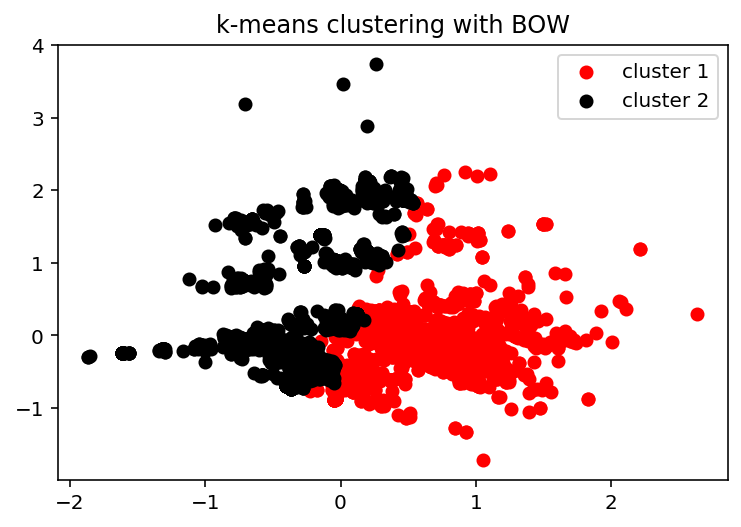

In [ ]:
plt.scatter(BOW_PCA[y_km_bow ==0,0], BOW_PCA[y_km_bow == 0,1],  c='red',label="cluster 1")
plt.scatter(BOW_PCA[y_km_bow==1,0], BOW_PCA[y_km_bow == 1,1],  c='black',label="cluster 2")
plt.title('k-means clustering with BOW')  
plt.legend()
plt.show()

## K-means with TF-IDF

In [ ]:
# perform TFIDF Vectorization
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).todense()
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_tfidf)
TFIDF_PCA=pca.transform(X_train_tfidf)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_km_tfidf = kmeans.fit_predict(X_train_tfidf)

silhouette_avg = silhouette_score(X_train_tfidf , y_km_tfidf)
print(silhouette_avg)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.002300869417349652


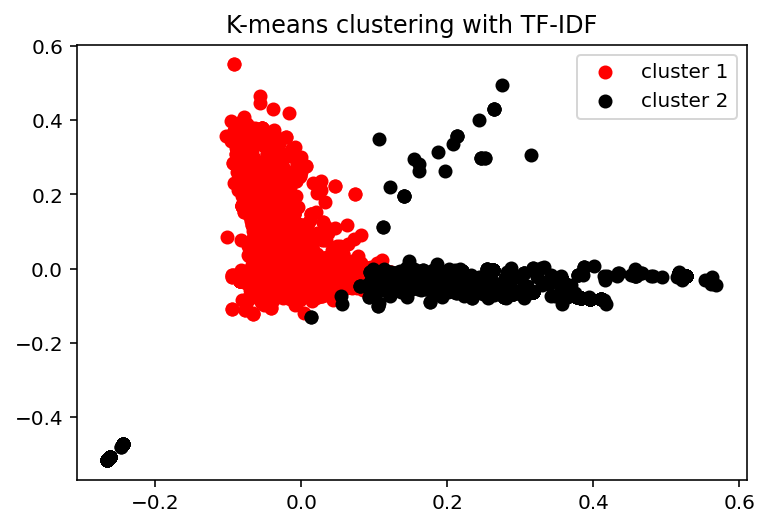

In [ ]:
plt.scatter(TFIDF_PCA[y_km_tfidf ==0,0], TFIDF_PCA[y_km_tfidf == 0,1],  c='red',label="cluster 1")
plt.scatter(TFIDF_PCA[y_km_tfidf==1,0], TFIDF_PCA[y_km_tfidf == 1,1],  c='black',label="cluster 2")
plt.title('K-means clustering with TF-IDF')  
plt.legend()
plt.show()

## K-means clustering with LDA

In [ ]:
# perform LDA Vectorization
lda = LatentDirichletAllocation()
X_train_lda = lda.fit_transform(X_train_counts)
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_lda)
LDA_PCA=pca.transform(X_train_lda)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_km_lda = kmeans.fit_predict(X_train_lda)

silhouette_avg = silhouette_score(X_train_lda , y_km_lda)
print(silhouette_avg)

#kappa_score= cohen_kappa_score(map_label(y_train) , y_km_lda)
#print(kappa_score)

0.2517065470677478


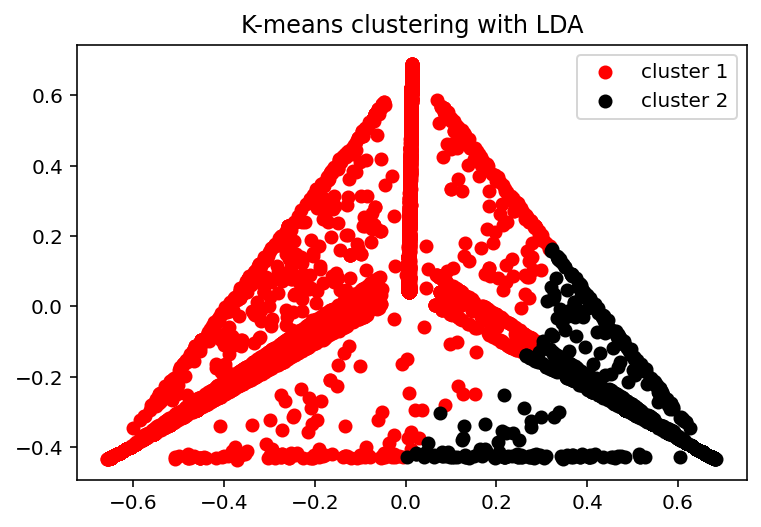

In [ ]:
plt.scatter(LDA_PCA[y_km_lda ==0,0], LDA_PCA[y_km_lda == 0,1],  c='red',label="cluster 1")
plt.scatter(LDA_PCA[y_km_lda==1,0], LDA_PCA[y_km_lda == 1,1],  c='black',label="cluster 2")
plt.title('K-means clustering with LDA')  
plt.legend()
plt.show()

## K-means clustering with TFIDF and LDA

In [ ]:
# perform LDA - TFIDF Vectorization
lda = LatentDirichletAllocation()
X_train_tfidf_lda = lda.fit_transform(X_train_tfidf)
#perform PCA to plot 
pca = PCA(n_components=2)
pca.fit(X_train_tfidf_lda)
LDA_TFIDF_PCA=pca.transform(X_train_tfidf_lda)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=10, random_state=0)
y_km_tfidf_lda = kmeans.fit_predict(X_train_tfidf_lda)



silhouette_avg = silhouette_score(X_train_tfidf_lda , y_km_tfidf_lda)
print(silhouette_avg)

0.1796770090509799


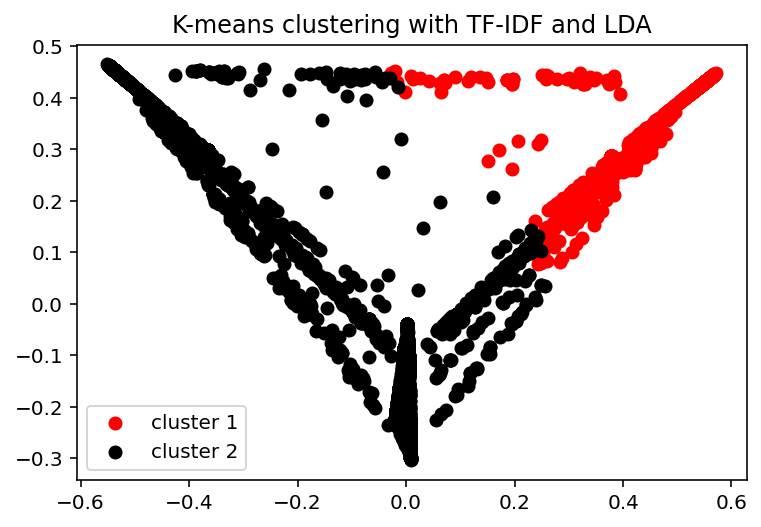

In [ ]:
plt.scatter(LDA_TFIDF_PCA[y_km_tfidf_lda ==0,0], LDA_TFIDF_PCA[y_km_tfidf_lda == 0,1],  c='red',label="cluster 1")
plt.scatter(LDA_TFIDF_PCA[y_km_tfidf_lda==1,0], LDA_TFIDF_PCA[y_km_tfidf_lda == 1,1],  c='black',label="cluster 2")
plt.title('K-means clustering with TF-IDF and LDA')  
plt.legend()
plt.show()

#Classification

## SVM with BOW

              precision    recall  f1-score   support

    Negative       0.87      0.72      0.78       542
     Neutral       0.89      0.97      0.93      1655
    Positive       0.92      0.86      0.89       838

    accuracy                           0.90      3035
   macro avg       0.89      0.85      0.87      3035
weighted avg       0.90      0.90      0.89      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


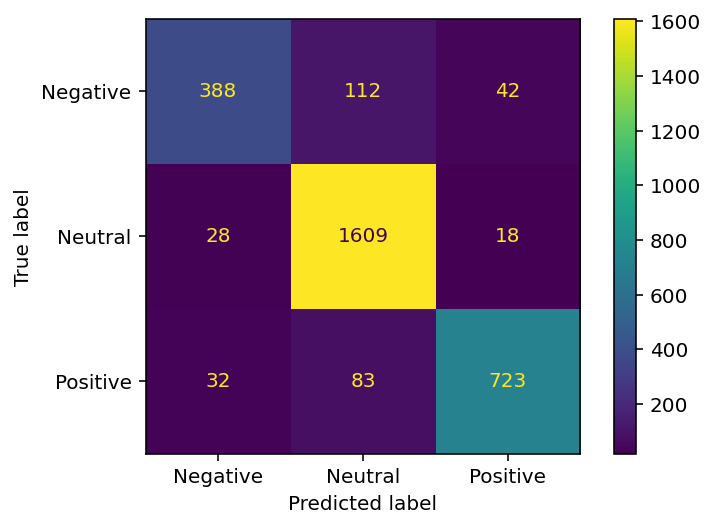

In [ ]:
from sklearn import svm
classifier([
    ('vect', CountVectorizer()),
    ('clf', svm.SVC(kernel='linear', C=1),)
])

## SVM with Bow & TF-IDF

              precision    recall  f1-score   support

    Negative       0.91      0.65      0.76       542
     Neutral       0.87      0.97      0.92      1655
    Positive       0.90      0.84      0.87       838

    accuracy                           0.88      3035
   macro avg       0.89      0.82      0.85      3035
weighted avg       0.88      0.88      0.88      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


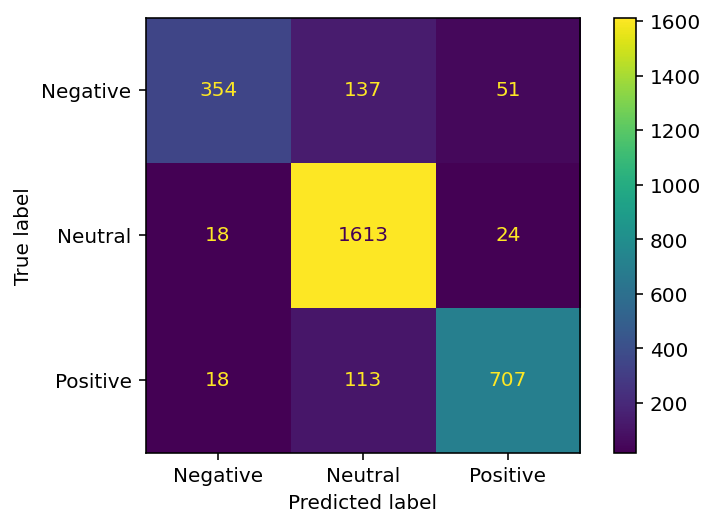

In [ ]:
classifier([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', svm.SVC(kernel='linear', C=1),)
])

## SVM with Bow & N-gram

              precision    recall  f1-score   support

    Negative       0.88      0.43      0.58       542
     Neutral       0.70      0.96      0.81      1655
    Positive       0.89      0.52      0.66       838

    accuracy                           0.75      3035
   macro avg       0.82      0.64      0.68      3035
weighted avg       0.78      0.75      0.73      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


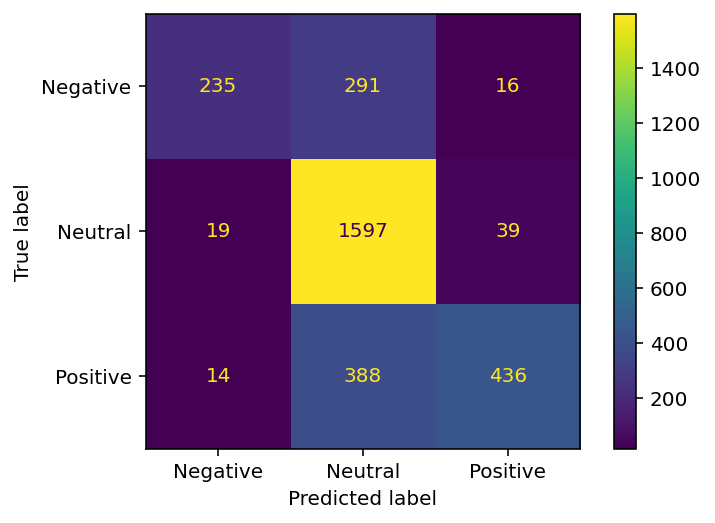

In [ ]:
classifier([
    ('vect', CountVectorizer(ngram_range=(2,2))),
    ('clf', svm.SVC(kernel='linear', C=1),)
])

## SVM with BOW & LDA

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       542
     Neutral       0.55      1.00      0.71      1655
    Positive       0.00      0.00      0.00       838

    accuracy                           0.55      3035
   macro avg       0.18      0.33      0.24      3035
weighted avg       0.30      0.55      0.38      3035



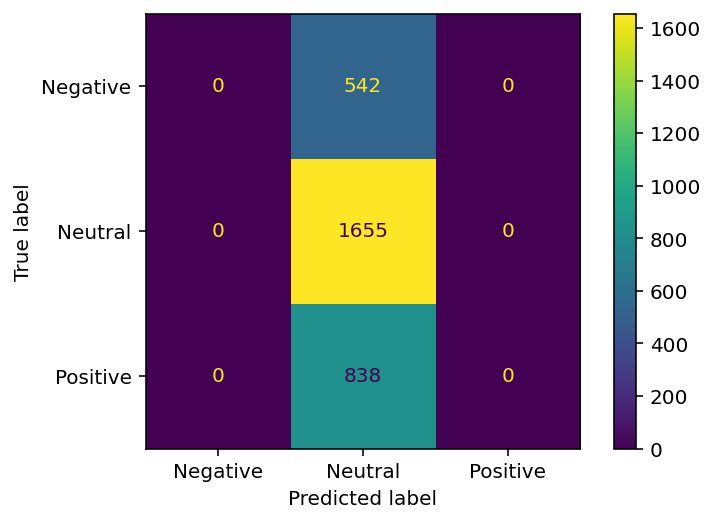

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
classifier([
    ('vect', CountVectorizer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', svm.SVC(kernel='linear', C=1),)
])

### SVM with BOW & LDA & TF-IDF

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       542
     Neutral       0.55      1.00      0.71      1655
    Positive       0.00      0.00      0.00       838

    accuracy                           0.55      3035
   macro avg       0.18      0.33      0.24      3035
weighted avg       0.30      0.55      0.38      3035



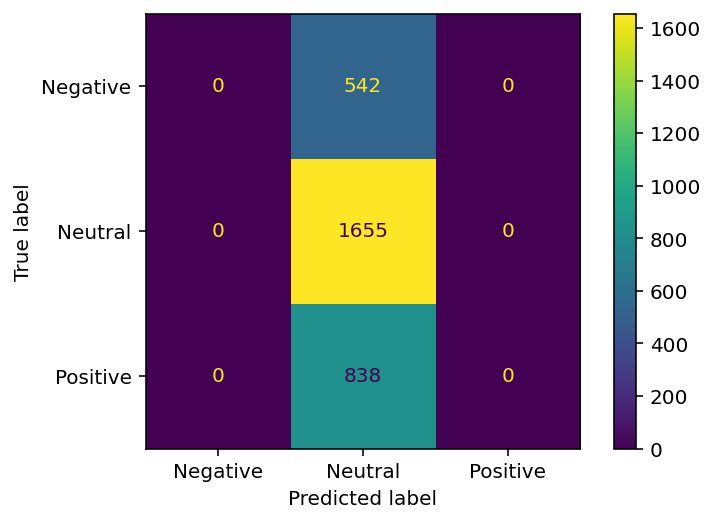

In [ ]:
classifier([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', svm.SVC(kernel='linear', C=1),)
])

#KNN

## KNN with BOW

              precision    recall  f1-score   support

    Negative       0.81      0.25      0.38       542
     Neutral       0.61      0.98      0.75      1655
    Positive       0.93      0.19      0.32       838

    accuracy                           0.63      3035
   macro avg       0.78      0.48      0.48      3035
weighted avg       0.73      0.63      0.57      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


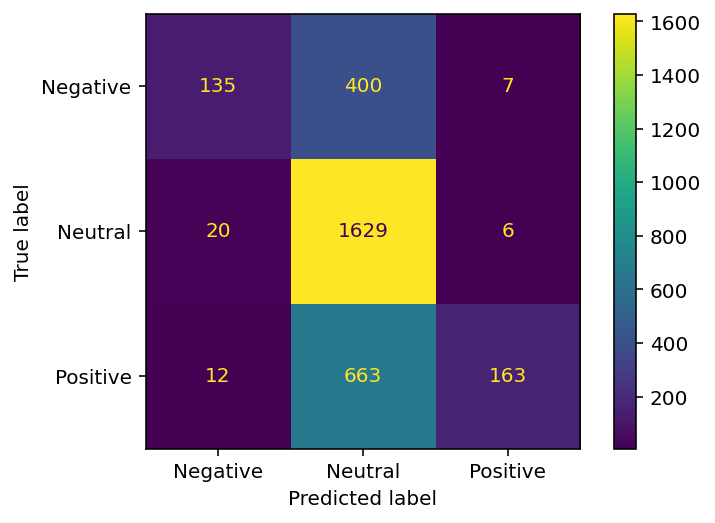

In [ ]:
classifier([
    ('vect', CountVectorizer()),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
    ])


## KNN with BOW & n-gram(bigram)

              precision    recall  f1-score   support

    Negative       0.94      0.22      0.36       542
     Neutral       0.59      1.00      0.74      1655
    Positive       0.99      0.15      0.26       838

    accuracy                           0.62      3035
   macro avg       0.84      0.46      0.45      3035
weighted avg       0.77      0.62      0.54      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


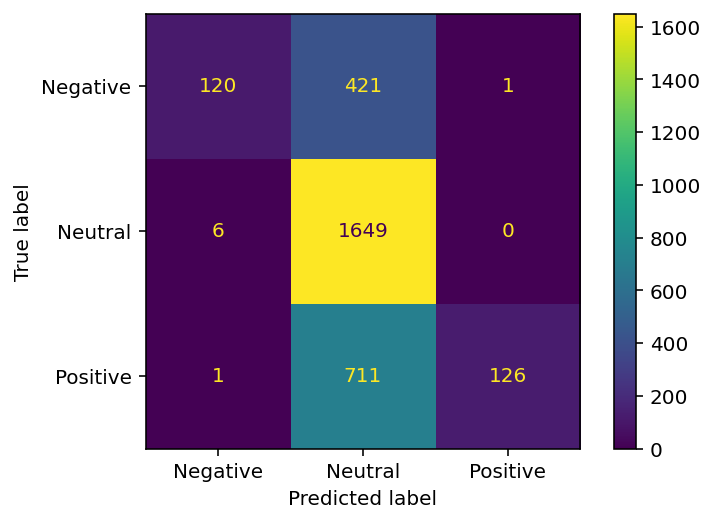

In [ ]:
classifier([
    ('vect', CountVectorizer(ngram_range=(2,2))),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
    ])


## KNN with BOW and LDA

              precision    recall  f1-score   support

    Negative       0.29      0.26      0.28       542
     Neutral       0.61      0.75      0.68      1655
    Positive       0.42      0.26      0.32       838

    accuracy                           0.53      3035
   macro avg       0.44      0.42      0.42      3035
weighted avg       0.50      0.53      0.51      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


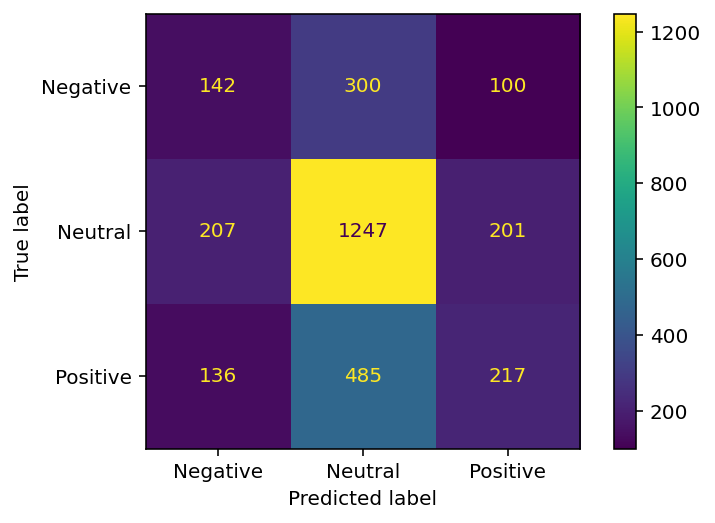

In [ ]:
classifier([
('vect', CountVectorizer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
        ('clf', KNeighborsClassifier(n_neighbors=4),)
    ])


## KNN with BOW ,TfIdf and LDA

              precision    recall  f1-score   support

    Negative       0.23      0.20      0.21       542
     Neutral       0.58      0.75      0.65      1655
    Positive       0.41      0.21      0.28       838

    accuracy                           0.50      3035
   macro avg       0.41      0.39      0.38      3035
weighted avg       0.47      0.50      0.47      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


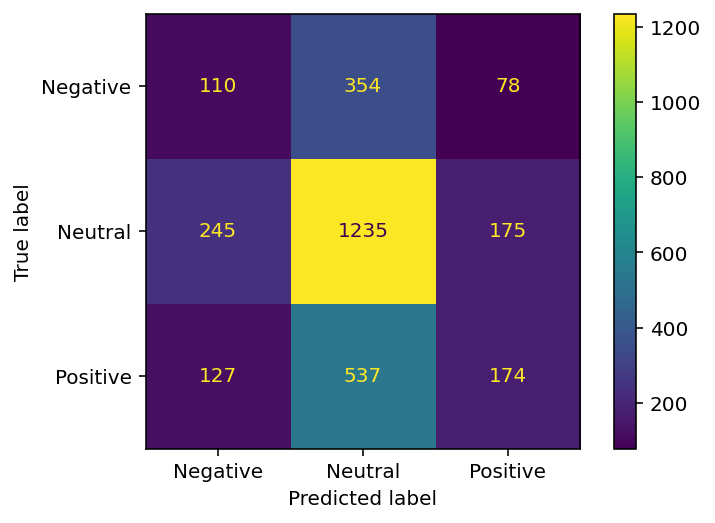

In [ ]:
classifier([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', KNeighborsClassifier(n_neighbors=4),)
    ])


#DT

## DT with BOW

              precision    recall  f1-score   support

    Negative       0.87      0.68      0.77       542
     Neutral       0.89      0.97      0.93      1655
    Positive       0.87      0.84      0.86       838

    accuracy                           0.88      3035
   macro avg       0.88      0.83      0.85      3035
weighted avg       0.88      0.88      0.88      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


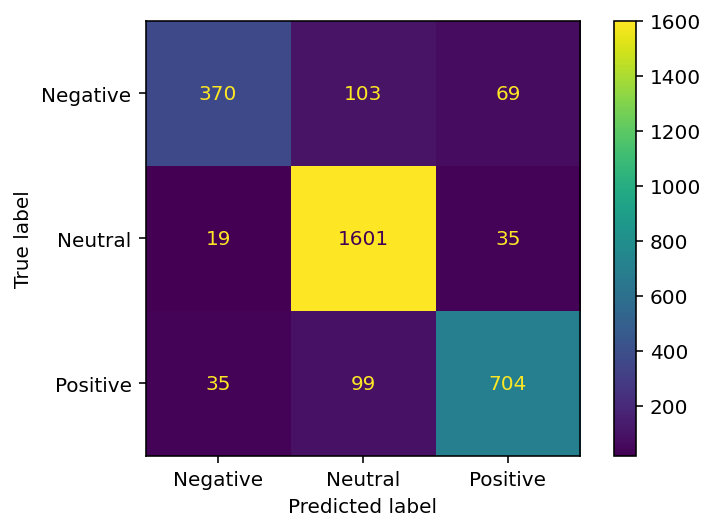

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier([
    ('vect', CountVectorizer()),
    ('clf', DecisionTreeClassifier())
    ])


## DT with BOW & n-gram(bigram)

              precision    recall  f1-score   support

    Negative       0.74      0.45      0.56       542
     Neutral       0.72      0.93      0.81      1655
    Positive       0.80      0.54      0.65       838

    accuracy                           0.74      3035
   macro avg       0.75      0.64      0.67      3035
weighted avg       0.75      0.74      0.72      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


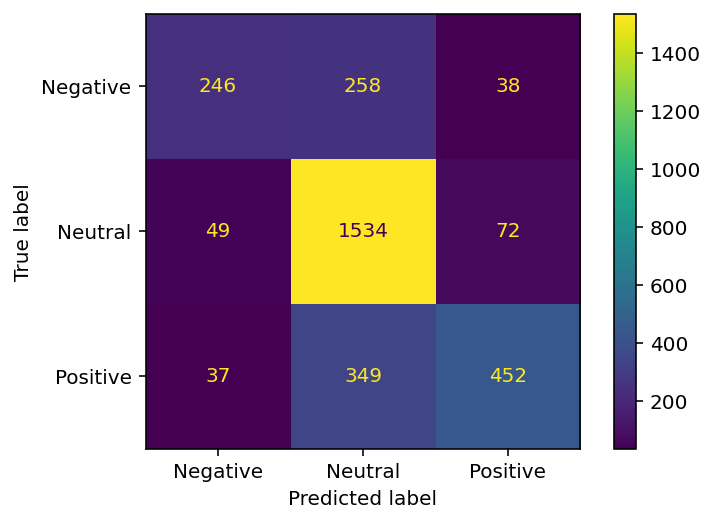

In [ ]:
classifier([
    ('vect', CountVectorizer(ngram_range=(2,2))),
    ('clf', DecisionTreeClassifier())
    ])


## DT with BOW and LDA

              precision    recall  f1-score   support

    Negative       0.35      0.30      0.32       542
     Neutral       0.65      0.69      0.67      1655
    Positive       0.42      0.41      0.42       838

    accuracy                           0.54      3035
   macro avg       0.47      0.47      0.47      3035
weighted avg       0.53      0.54      0.54      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


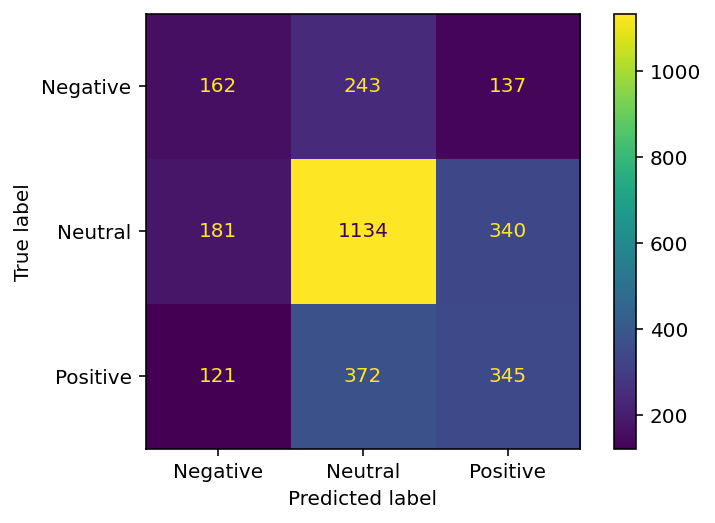

In [ ]:
classifier([
('vect', CountVectorizer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
        ('clf', DecisionTreeClassifier(),)
    ])


## DT with BOW ,TfIdf and LDA

              precision    recall  f1-score   support

    Negative       0.30      0.31      0.30       542
     Neutral       0.66      0.71      0.68      1655
    Positive       0.46      0.38      0.41       838

    accuracy                           0.55      3035
   macro avg       0.47      0.47      0.47      3035
weighted avg       0.54      0.55      0.54      3035



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


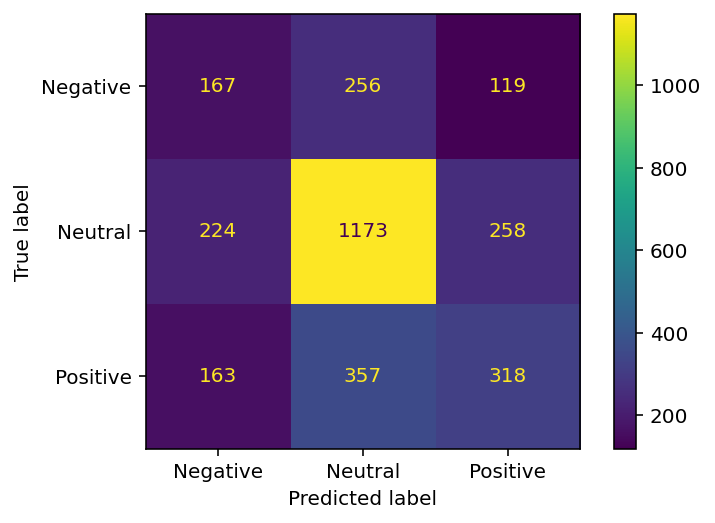

In [ ]:
classifier([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lda',LatentDirichletAllocation(n_components=5,random_state=0)),
    ('clf', DecisionTreeClassifier(),)
    ])


# Multi-lingual

In [ ]:
import pickle
model = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', svm.SVC(kernel='linear', C=1),)
])
model.fit(vaccine_tuples[0],vaccine_tuples[1])
filename = 'Vaccine_sentiment_anaylsiser.sav'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(["vaccine is good"])[0]

'Positive'

In [ ]:
pip install pysentimiento

In [ ]:
pip install fastText

In [ ]:
import fasttext
def predict_language(text, language_classifier):
    language = language_classifier.predict(text)
    return language
language_classifier = fasttext.load_model('/content/lid.176.ftz')

In [ ]:
def language_labeling(tweet_list):
  lang_list = []
  for tweet in tweet_list: 
    #  tweet = re.sub(r'\n', ' ', tweet) 
     y=predict_language(tweet,language_classifier)
     y=str(y[0])
     d=re.findall(r"__label__(\w+)",y)
     lang_list.append(d[0])
  return lang_list

In [ ]:
df["language"]=language_labeling(df["Clean_text"].values)

In [ ]:
df.language.value_counts

<bound method IndexOpsMixin.value_counts of 0       en
1       en
2       en
3       en
4       en
        ..
4995    en
4996    en
4997    en
4998    en
4999    pt
Name: language, Length: 12140, dtype: object>

In [ ]:
np.unique(df.language)

array(['ar', 'ca', 'ceb', 'cs', 'da', 'de', 'el', 'en', 'eo', 'es', 'fa',
       'fi', 'fr', 'gu', 'he', 'hi', 'hr', 'hu', 'id', 'ilo', 'is', 'it',
       'ja', 'lv', 'mk', 'mn', 'ms', 'nl', 'no', 'pl', 'pnb', 'pt', 'ro',
       'ru', 'sk', 'sl', 'sr', 'sv', 'th', 'tl', 'tr', 'ur', 'vi', 'war',
       'zh'], dtype=object)

In [ ]:
from pysentimiento import create_analyzer
labels=[]
for tweet,langs in zip(df.Clean_text.values,df.language.values):
    analyzer = create_analyzer(task="sentiment", lang=langs)

    analyzer.predict(tweet)